# EDA To Prediction(DieTanic)

##### "이유한님의 캐글 코리아 캐글 스터디 커널 커리큘럼"에 따라 필사한 내용입니다.

- 필사 노트북의 원 출처 : https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

----------

### Why is the name DieTanic?
- 1912년 4월 15일, 빙하에 의해 2224명의 승객 중 1502명이 죽은 악명 높은 난파 사고이기 때문이다.

#### - Tatanic data는 kaggle conpatition에 처음 참여해서 공부하기 좋은 데이터이다.
#### - "DieTanic"은 모델링을 통해 어떤 결과를 예측할 때 워크플로우에 대한 기본적인 아이디어를 제공한다.

----------

### DieTanic의 목차

1. Exploratory Data Analysis(EDA)<br>
  1) Anaylsis of the features.<br>
  2) Finding any relations or trends considering multiple features.<br>
  <br>
2. Feature Engineering and Data Cleaning<br>
  1) Adding any few features.<br>
  2) Removing redundent features.<br>
  3) Converting features into suitable from for modeliing<br>
  <br>
3. Predictive Modeling<br>
  1) Running Basic Algorithms.<br>
  2) Cross Validation.<br>
  3) Ensembling.<br>
  4) Important Features Extraction.<br>

----------

## 1. Exploratory Data Analysis - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
!pip install seaborn

In [3]:
# data load
data = pd.read_csv("./dataset/titanic/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# dataset null check
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 중 null 값이 존재하는 열은 Age, Cabin, Embarked이다. 노트 저자는 이것을 어떻게 처리할까?

###### How many Survived?

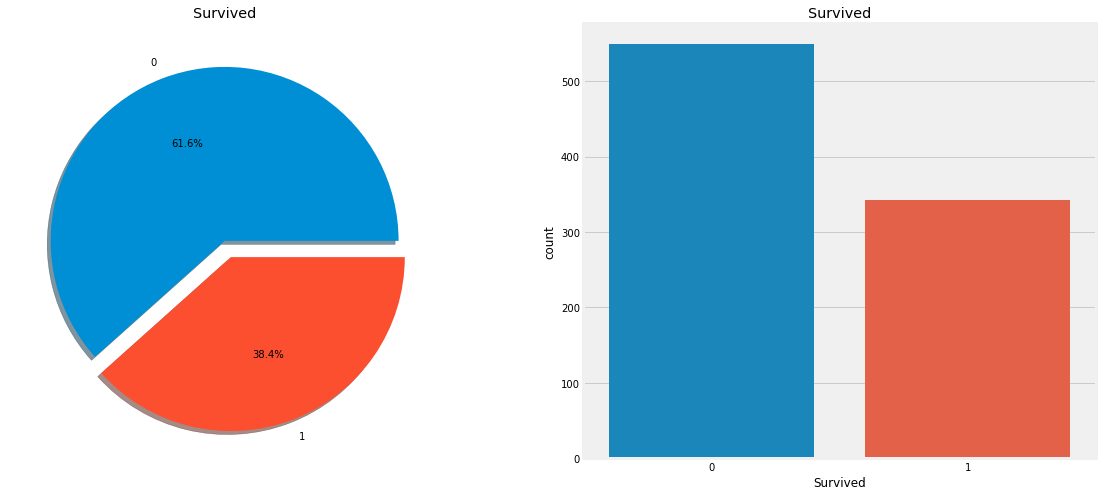

In [6]:
# 1 x 2 개의 그래프를 넣을 수 있는 subplot 생성
f, ax = plt.subplots(1, 2, figsize = (18,8))

# [0,0] 위치에 pie plot 생성
data["Survived"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%",
                                         ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

# [0,1] 위치에 bar plot 생성
sns.countplot("Survived", data = data, ax = ax[1])
ax[1].set_title("Survived")
plt.show()

위 그래프를 보시면 많은 사람이 살아남지 못했다.

학습 데이터에는 총 891명의 승객 정보가 있으며, 그 중 살아남은 승객의 수는 350명입니다. 이것을 백분율로 환산하면 38.4%에 해당된다.<br>
우리는 앞으로 이 데이터를 통해 승객의 어떤 카데고리가 살아남게 했는지 아닌지를 알아내야 합니다.<br>
타이타닉 데이터의 다른 feature를 사용하여 생존율을 확인할 것이다. <br>

먼저 서로 다른 타입의 feature에 대해 알아보자.

-------

###  Type of Features
##### Categorical features(명목형 데이터):<br>
데이터셋에서 categorical features : Sex, Embarked

##### Ordinal features(순서형 데이터):<br>
데이터셋에서 ordinal features : Pclass

##### Continuos features(연속형 데이터):<br>
데이터셋에서 continuos features : Age

 ------

### Analysising The Features
##### Sex -> Categorical Feature

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

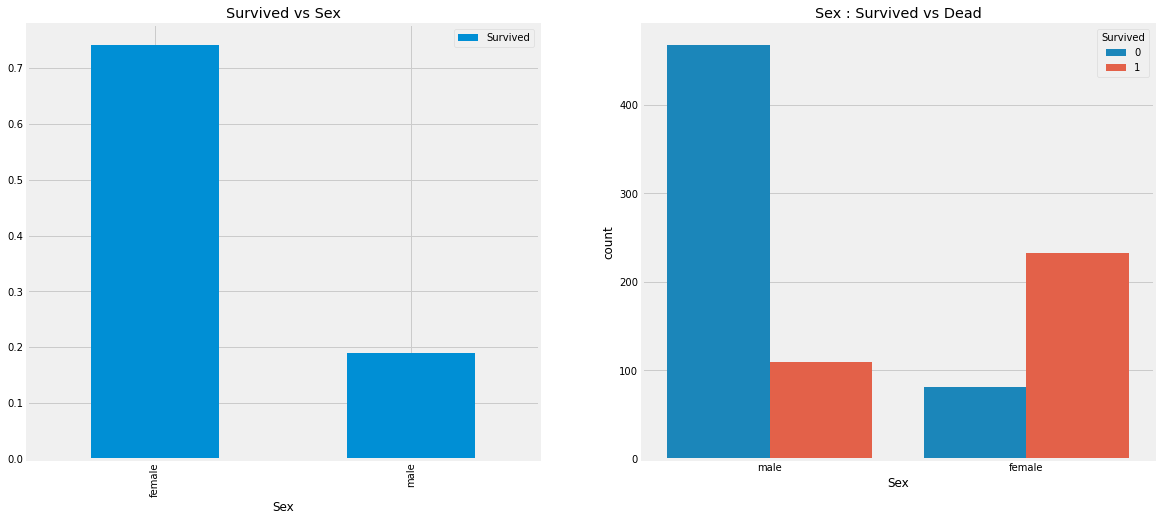

In [17]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

배에 탄 인원 수는 남성이 더 많지만 생존 수를 보면 여성의 수가 더 많다.<br>
왼쪽 그래프와 같이 여성의 생존율은 70%를 상회하는 반면, 남성의 생존율은 20%보다 못 미친다.<br>

이 feature는 매우 중요해보인다. 다른 feature도 알아보자.

###### Pclass -> Orinal Feature

In [20]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


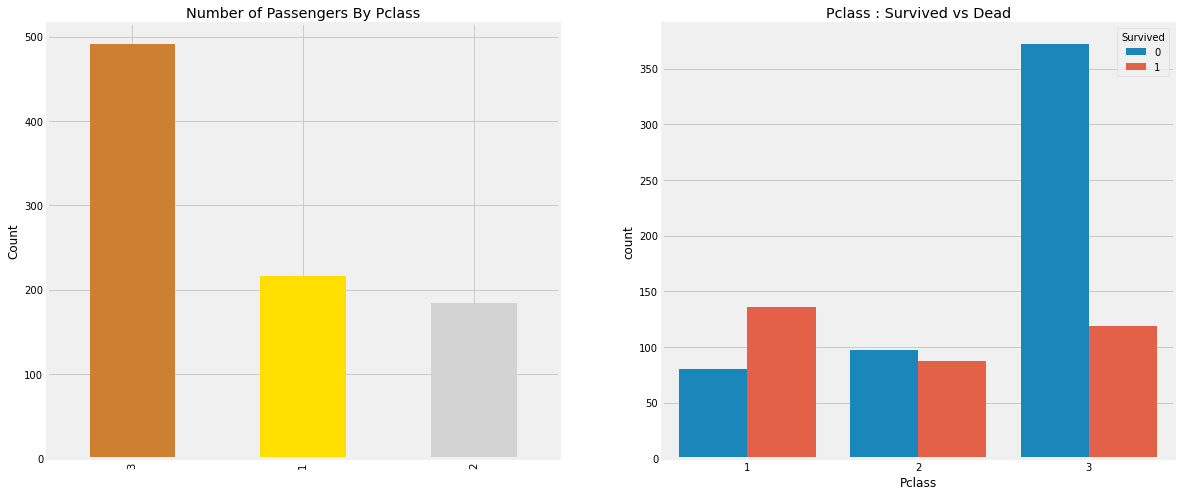

In [23]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead')

plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말한다. 하지만 Pclass가 1인 승객이 우선적으로 구조되었다는 것을 알 수 있다.

Pclass가 3인 승객이 가장 많은 승객 수를 차지했지만, 그들의 생존률은 25%에 불과했다.<br>
Pclass가 1인 승객은 63%, Pclass가 2인 승객은 48%이다. 노트의 저자는 위와 같은 결과를 보았을 때 돈과 지위는 매우 중요하다고 말하고 있다.

그렇다면 생존율과 Sex와 Pclass를 동시에 본 결과는 어떨까?

In [25]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

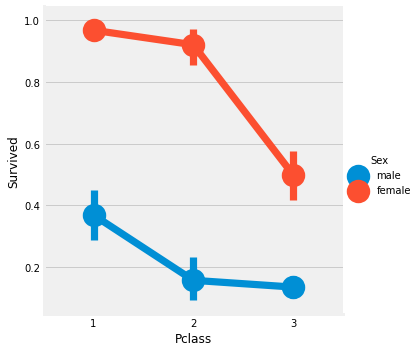

In [26]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

위 케이스의 경우 **Factorplot**을 사용했는데 명목형 데이터를 분리하여 표현할 때 유용하기 때문이다.

**Crosstap**과 **Factorplot**을 보면 우리는 쉽게 알 수 있는데 **Pclass가 1인 여성**의 생존율은 **95~96%**이며 94명 중 3명만 죽었다.

Pcalss와 관계 없이 여성이기 때문에 가장 우선적으로 구조되었음을 알 수 있다. 그 이유는 Pclass가 1인 남성의 생존율이 낮았기 때문이다.

Pclass도 중요한 feature인 것을 확인했다. 다른 feature들도 알아보자.

##### Age -> Continuos Feature

In [27]:
print('Oldest Passenger was of: ', data['Age'].max(), "Years")
print('Youngest Passenger was of: ', data['Age'].min(), "Years")
print('Average Passenger was of: ', data['Age'].mean(), "Years")

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Passenger was of:  29.69911764705882 Years


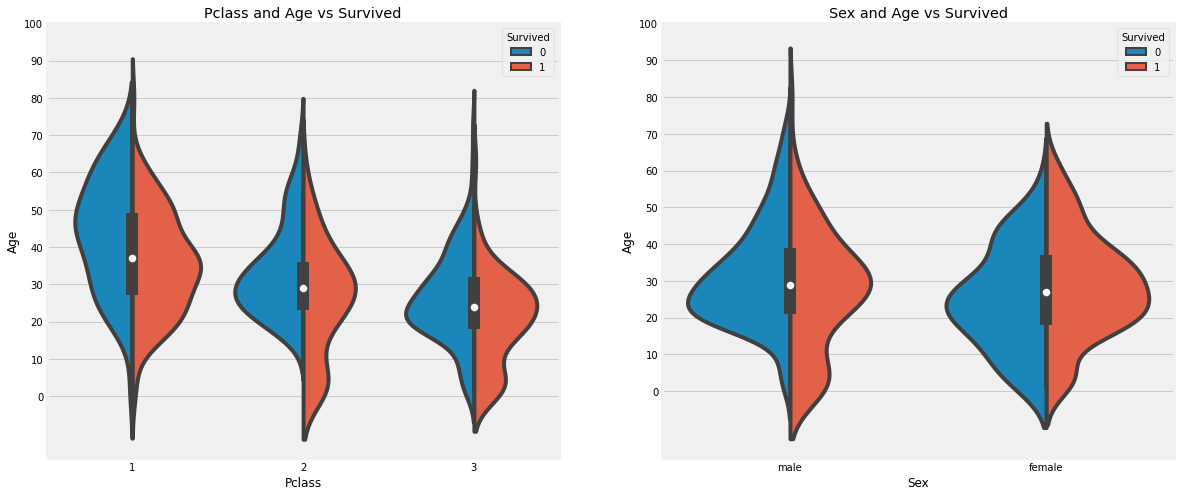

In [29]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

위 그래프를 보며:<br>
1) 10살 이하의 어린아이들은 Pclass가 낮으면 그 수가 많으며, 생존율은 Pclass와 관계 없이 좋다.<br>
2) Pclass가 1이며 나이가 20~50대인 승객들의 생존 가능성은 승객이 여성의 생존 가능성보다 좋다.<br>
3) 남성의 생존 가능성은 나이가 많이질수록 낮아진다.<br>

위에서 본 바와 같이 Age에는 177개의 null 값이 존재한다. 이것을 우리가 자주 사용하는 mean값으로 대처할 수 있다.

하지만, 나이가 4세인 승객에게 평균인 29세를 할당할 수 없다.

노트의 저자가 찾은 방법은 승객의 **Name** feature를 사용하여 조금 더 상세하게 특정 값을 부여했다.

Name에는 Mr나 Mrs 같은 단어들이 있는데, 이런 단어들을 포함하는 그룹끼리 구성하여 그룹 마다의 특성을 사용하여 특정 값을 부여하고자 한다.

In [38]:
data['Initial'] = 0
for i in data:
    # 정규식 사용하여 온점 이전의 모든 영어를 가져와 "Initail" 컬럼에 부여
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # Let extract the Salutations

In [39]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = "summer_r") # checking the Initial and Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
# 세분화된 요인들을 변경
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer','Col', 'Rev', 'Capt', 'Sir', 'Don'],
                       ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                       inplace = True)

In [41]:
data.groupby('Initial')['Age'].mean() # Let check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### Filling NaN Ages

In [42]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), "Age"] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [43]:
data.Age.isnull().any()

False

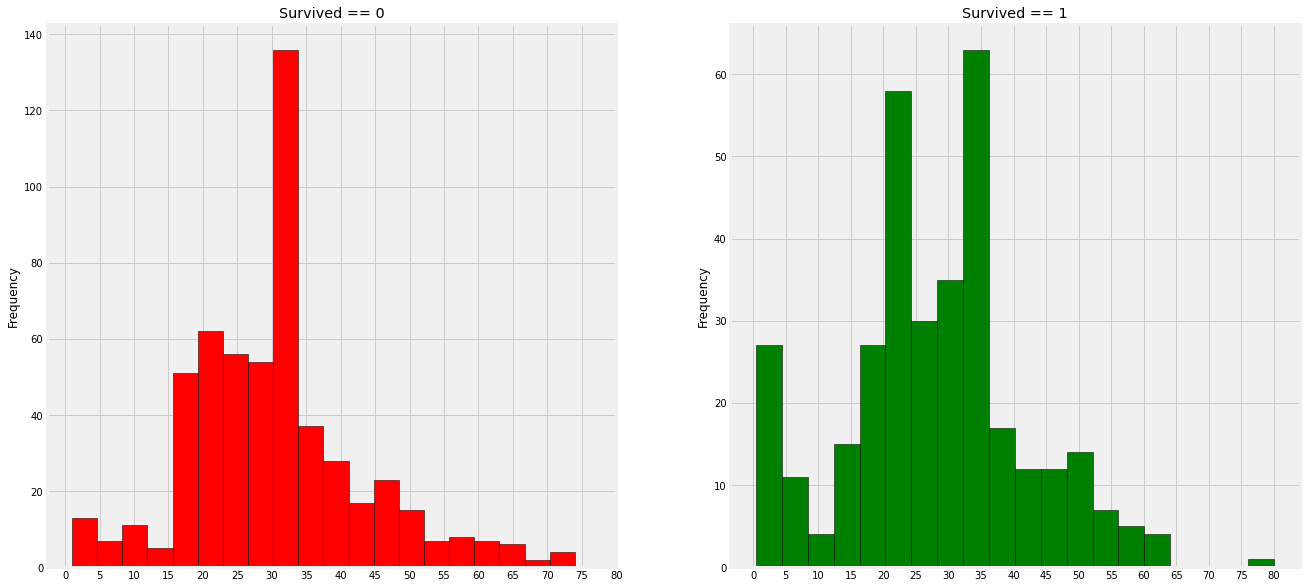

In [46]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived == 1')
ax[1].set_xticks(x1)

plt.show()

위 그래프를 보며:
    
1) 5세 이하의 아이들의 생존 수가 많다.(여성과 아이들을 먼저 구하는 정책 때문.)<br>
2) 가장 나이가 많은 승객이 생존했다.<br>
3) 가장 많이 죽은 연령층은 30~40대 이다.<br>

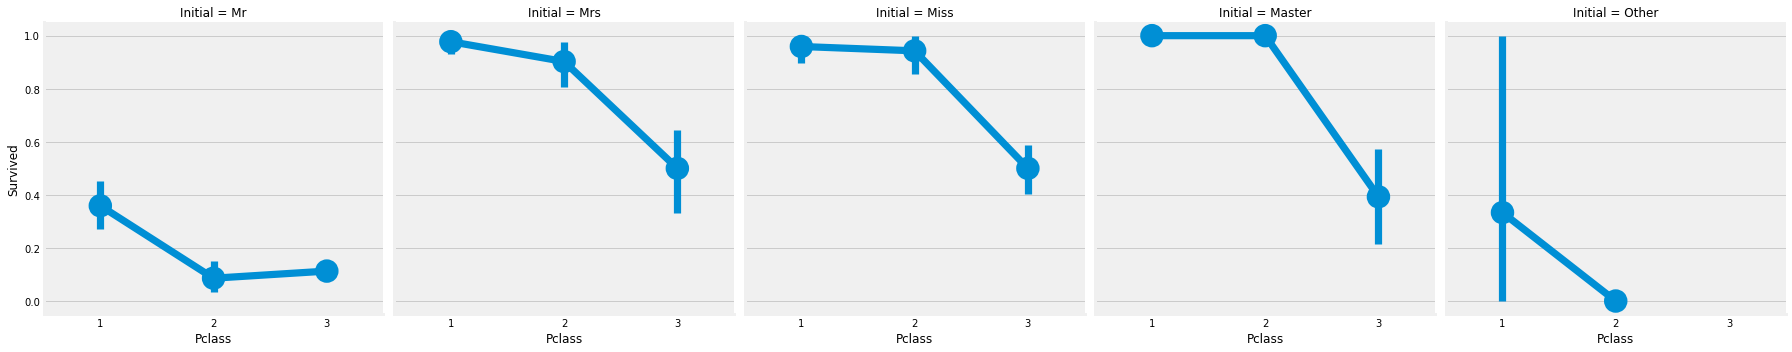

In [47]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

##### Embarked -> Categorical Feature

In [50]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

##### Chances for Survival by Port of Embarkation

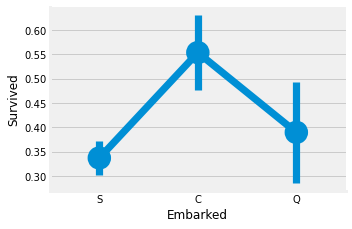

In [51]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

C 포트의 생존율이 55%로 가장 높았고 S 포트의 생존율은 가장 낮다.

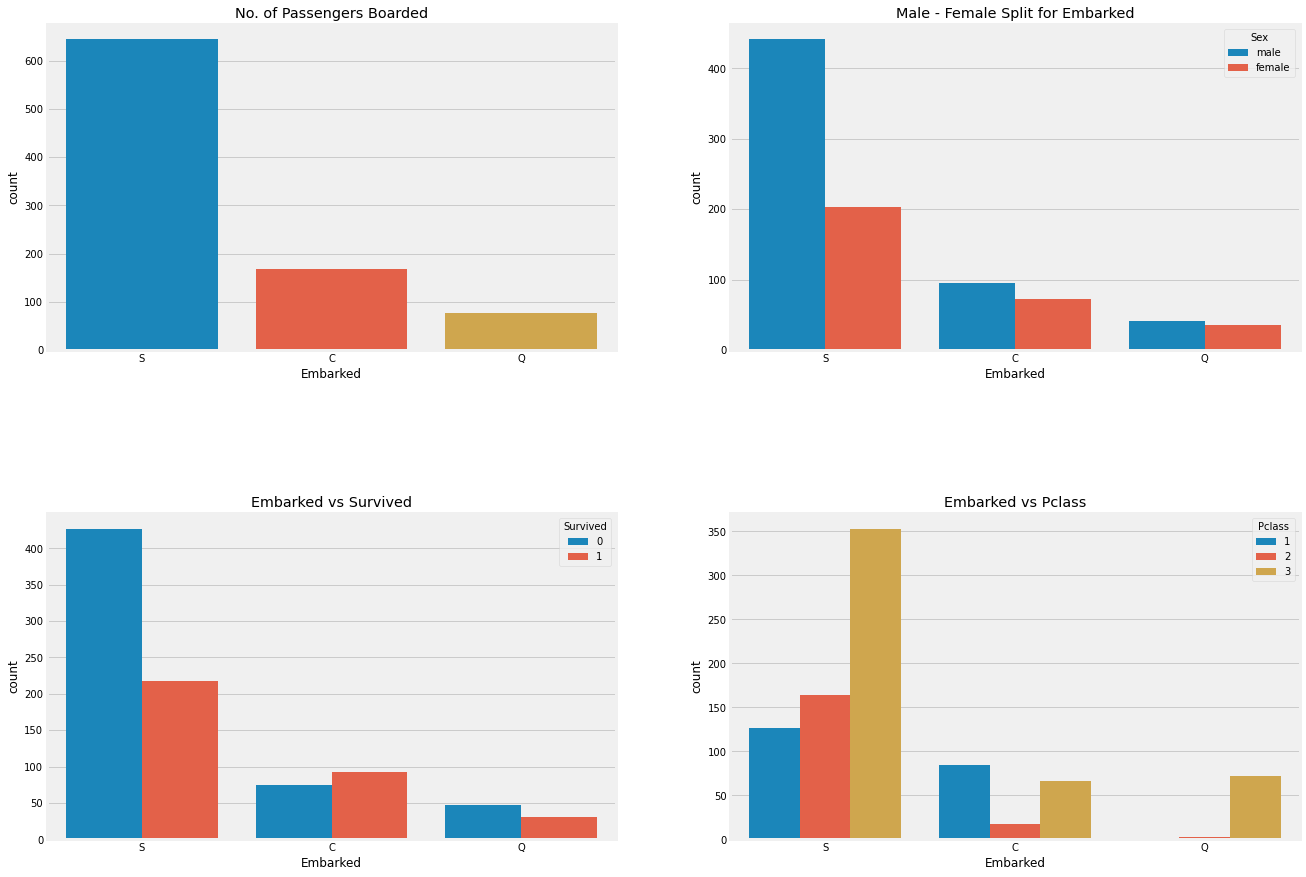

In [52]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0, 1].set_title('Male - Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

1. 데이터셋 description
2. 분석 기법의 **간략한 이론**
3. 라이브러리 사용법
4. 해당 커널의 특징(다른 커널과의 차별점)
5. 배운점 및 어려웠던 점